Linear regression scratch

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
class ScratchLinearRegression():
    """
    Scratch implementation of linear regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process

    Attributes
    ----------
    self.coef_ : of the following form. ndarray, shape (n_features,)
      Parameters
    self.loss : of the following form. ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : of the following form. ndarray, shape (self.iter,)
      Record loss on validation data
    """

    def __init__(self, num_iter=1000, lr=0.01, no_bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose

        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def _linear_hypothesis(self,X):
        """
        Compute a linear hypothetical function

        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
          Training data

        Returns
        -------
          of the following form. ndarray, shape (n_samples, 1)
          Estimated result by linear hypothetical function

        """
        x1 = X

        # x0 Create a bias term.
        if self.no_bias == True:
            x0 = np.zeros(x1.shape[0])
        else:
            x0 = np.ones(x1.shape[0])

        return np.concatenate([x0.reshape(-1,1)], axis=1)

    def _gradient_descent(self, X, error):
        """
        Using the steepest descent method, the value of 0 is updated and learned.
        Parameters
        ----------
        X : The following form of ndarray, shape(n_samples, n_features)
            Features of training data
        error : Error between true value and estimated value
        """

        self.theta = self.theta - self.lr*np.dot(error,X)/len(X)


    def fit(self, X, y, X_val=False, y_val=False):
        """
        Learn linear regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            Features of training data
        y : of the following form. ndarray, shape (n_samples, )
            Correct answer value of training data
        X_val : of the following form. ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : of the following form. ndarray, shape (n_samples, )
            Correct value of verification data
        """
        x1 = self._linear_hypothesis(X)

        #Give the initial value of parameter 0 as arandom number
        self.theta = np.random.random(x1.shape[1])

        for i in range(self.iter):
            # Compute predictions with hypothetical functions
            y1 = np.dot(x1,self.theta)

            # Calculate the error between the true value and the predicted value
            error = y1 - y
            self.loss[i] += np.mean(error**2)/2

            # If X_valid is entered, it will be read as x2
            if (type(X_val) != bool):
                x2 = self._linear_hypothesis(X_val)
                y2 = np.dot(x2,self.theta)

                error_val = y2 - y_val
                self.val_loss[i] += np.mean(error_val**2)/2

            # optimize the parameter 0 by the steepest  descent method
            self._gradient_descent(x1, error)


            if self.verbose:
            #Output learning process when verbose is set to True
                print('n_iter:', i,
                      'loss:', self.loss[i],
                      'theta:', self.theta)


    def predict(self, X):
        """
        Estimate using linear regression.
        Parameters
        ----------
        X : of the following form. ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            of the following form. ndarray, shape (n_samples, 1)
            Estimated result by linear regression
        """

        return np.dot(self._linear_hypothesis(X),self.theta)

Problem 1: Hypothetical Function

In [33]:
# Test outside the function
x1 = np.array([0,1,2,3,4,5,6,7,8,9])
x0 = np.ones(x1.shape[0])

X = np.concatenate([x0.reshape(-1,1), x1.reshape(-1,1)], axis=1)
theta = np.random.random(X.shape[1])

In [34]:
X.shape

(10, 2)

In [35]:
theta

array([0.78140562, 0.14114371])

In [36]:
np.dot(X,theta)

array([0.78140562, 0.92254933, 1.06369304, 1.20483675, 1.34598045,
       1.48712416, 1.62826787, 1.76941158, 1.91055528, 2.05169899])

Problem 2: Least-squares method

In [37]:
# Calculate only once outside the function
x1 = np.array([0,1,2,3,4,5,6,7,8])
y = np.array([2,4,2,1,6,7,8,5,2])

x0 = np.ones(x1.shape[0])
X = np.concatenate([x0.reshape(-1,1), x1.reshape(-1,1)], axis=1)
theta = np.random.random(2)

y1 = np.dot(X,theta)

alpha = 0.01

error = (y1 - y)
theta[0] = theta[0] - alpha*np.mean(error)
theta[1] = theta[1] - alpha*np.mean(error*x1)

In [38]:
np.mean(error)

-0.1454823849579118

In [39]:
np.mean(error*x1)

2.2284556739042074

In [40]:
# Try to do the theta calculation in one line
np.dot(error,X)

array([-1.30934146, 20.05610107])

In [41]:
# Calculate only once outside the function
x1 = np.array([0,1,2,3,4,5,6,7,8])
y = np.array([2,4,2,1,6,7,8,5,2])

x0 = np.ones(x1.shape[0])
X = np.concatenate([x0.reshape(-1,1), x1.reshape(-1,1)], axis=1)
theta = np.random.random(2)

y1 = np.dot(X,theta)

alpha = 0.01

error = (y1 - y)

theta = theta - alpha*np.dot(error,X)/len(X)
print(theta)

[0.97386031 0.89115181]


In [42]:
X.shape

(9, 2)

In [43]:
y1.shape

(9,)

In [44]:
y1.reshape(-1,1)

array([[0.98096991],
       [1.94124511],
       [2.90152031],
       [3.86179552],
       [4.82207072],
       [5.78234592],
       [6.74262113],
       [7.70289633],
       [8.66317153]])

In [45]:
y1.shape

(9,)

In [46]:
y.shape

(9,)

In [47]:
error.reshape(-1,1)

array([[-1.01903009],
       [-2.05875489],
       [ 0.90152031],
       [ 2.86179552],
       [-1.17792928],
       [-1.21765408],
       [-1.25737887],
       [ 2.70289633],
       [ 6.66317153]])

In [48]:
theta

array([0.97386031, 0.89115181])

Problem 3: Estimation

In [49]:
X = np.random.randn(30,1)
y = np.random.randn(30)
X_test = np.random.randn(5,1)

In [50]:
X.max()

2.38893517413104

In [51]:
print('X.shape',X.shape)
print('y.shape',y.shape)

X.shape (30, 1)
y.shape (30,)


In [52]:
reg = ScratchLinearRegression(num_iter=10000, lr=0.0001, verbose=False)

reg.fit(X,y)
y_pred = reg.predict(X_test)

In [53]:
print(y_pred.shape)

(5,)


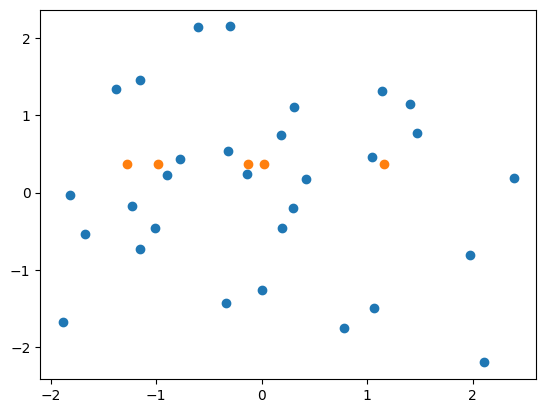

In [54]:
plt.scatter(X,y)
plt.scatter(X_test, y_pred)
plt.plot();

Problem 4: Mean Square Error

In [55]:
# Mean Square Error
def MSE(y_pred, y):
    """
    Calculation of mean square error

    Parameters
    ----------
    y_pred : of the following form. ndarray, shape (n_samples,)
      Estimated value
    y : of the following form. ndarray, shape (n_samples,)
      Correct answer value

    Returns
    ----------
    mse : numpy.float
      Mean squared error
    """
    mse = np.mean((y_pred - y)**2)
    pass
    return mse

In [56]:
y_test = np.array([2,4,2,1,6])
y_pred = np.array([1,4,3,5,2])

mse = MSE(y_pred, y_test)
mse

6.8

In [57]:
# Verify results
from sklearn.metrics import mean_squared_error

y_test = np.array([2,4,2,1,6])
y_pred = np.array([1,4,3,5,2])

mean_squared_error(y_pred, y_test)

6.8

Problem 5: Objective Function

In [58]:
print(reg.loss.shape)
reg.loss.reshape(-1,1)

(10000,)


array([[1.0284032 ],
       [1.02832344],
       [1.0282437 ],
       ...,
       [0.68358472],
       [0.68357392],
       [0.68356312]])

In [59]:
print(reg.val_loss.shape)
reg.val_loss.reshape(-1,1)

(10000,)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

Problem 6: Learning and Estimation

In [60]:
# Load the train data of the house prices
train = pd.read_csv('Housing_train.csv')
print('shape:', train.shape)
train.head()

shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
X = train[['YearBuilt']].values
y = train[['SalePrice']].values
y = y.reshape(-1)
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X.shape: (1460, 1)
y.shape: (1460,)


In [62]:
# Split into training data and validation data
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = \
train_test_split(X,y,train_size=0.8,random_state=0)

#X_train, X_valid, y_train, y_valid = train_test_split(X,y,train_size=0.8,random_state=0) # Same as line 4 & 5 above

print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_valid.shape:', X_valid.shape)
print('y_valid.shape:', y_valid.shape)

X_train.shape: (1168, 1)
y_train.shape: (1168,)
X_valid.shape: (292, 1)
y_valid.shape: (292,)


In [63]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_valid_std = scaler.transform(X_valid)

In [64]:
reg1 = ScratchLinearRegression(num_iter=10000, lr=0.0001)

reg1.fit(X_train_std, y_train, X_valid_std, y_valid)
y_pred1 = reg1.predict(X_valid_std)

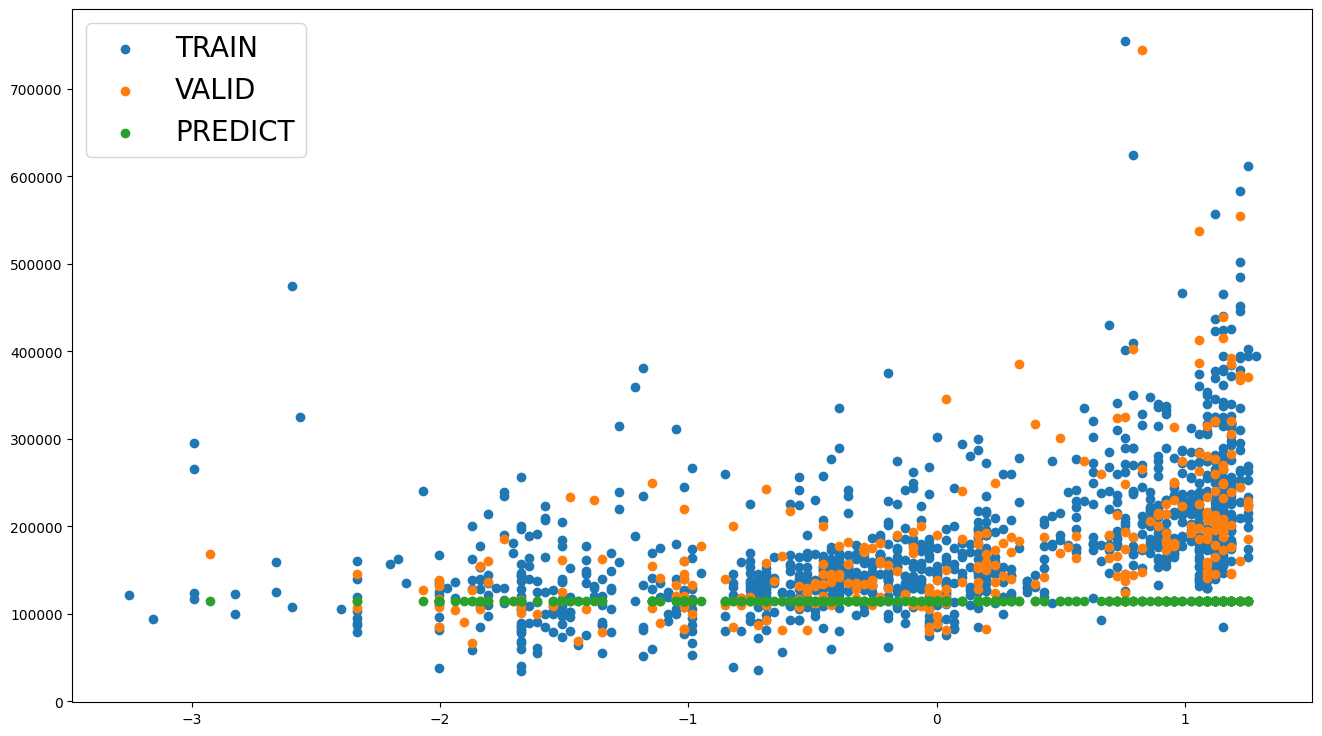

In [65]:
# Visualization of training, validation, and prediction data
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std, y_train, label = "TRAIN")
plt.scatter(X_valid_std, y_valid, label="VALID")
plt.scatter(X_valid_std, y_pred1, label="PREDICT")
plt.legend()
plt.plot();

In [66]:
# mean square error
mse = MSE(y_pred1, y_valid)
print('MSE{:1f}'.format(mse))
print('RMSE{:1f}'.format(np.sqrt(mse)))

MSE11404761437.149042
RMSE106793.077665


In [67]:
from sklearn.linear_model import LinearRegression

reg2 = LinearRegression()

reg2.fit(X_train_std, y_train)
y_pred_sklearn = reg2.predict(X_valid_std)

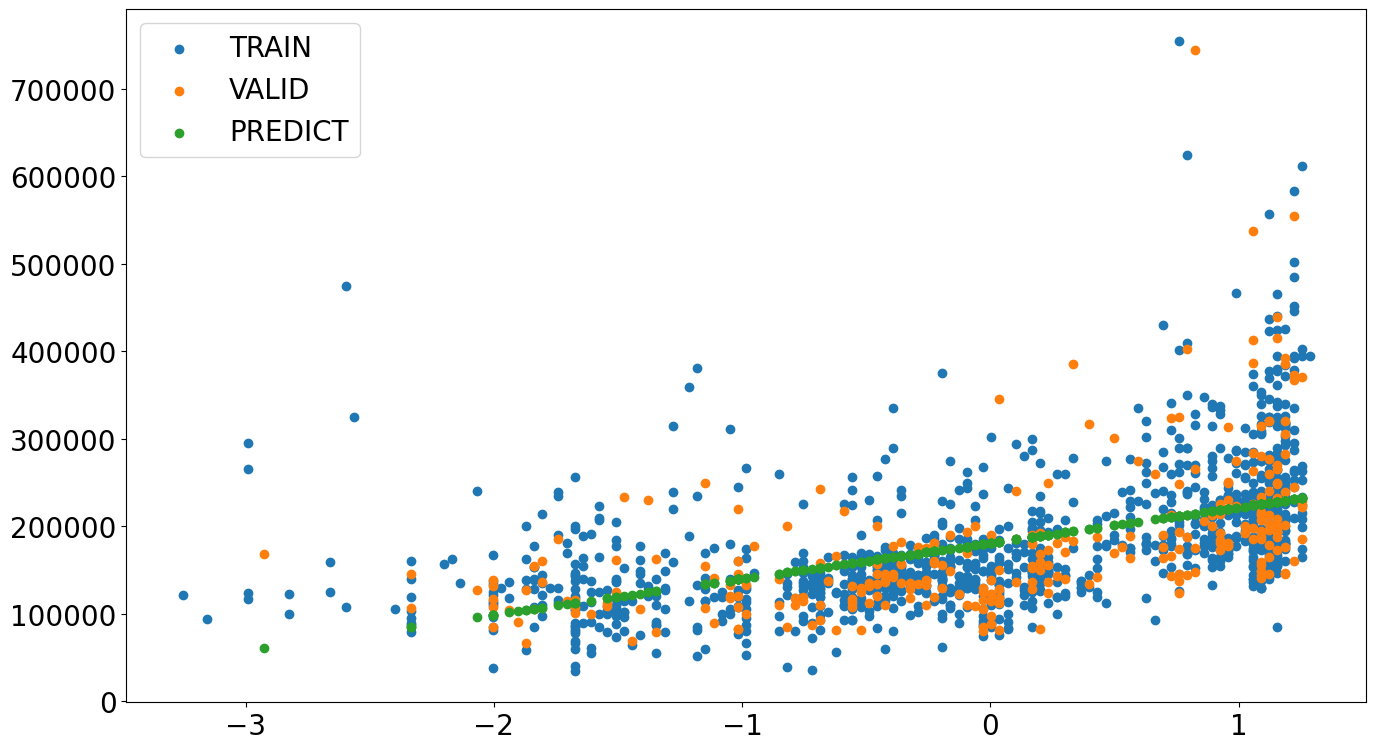

In [68]:
# Visualizing Predictive Data with Sklearn
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std, y_train, label = "TRAIN")
plt.scatter(X_valid_std, y_valid, label="VALID")
plt.scatter(X_valid_std, y_pred_sklearn, label="PREDICT")
plt.legend()
plt.plot();

In [69]:
# mean square error
mse = MSE(y_pred_sklearn, y_valid)
print('MSE{:1f}'.format(mse))
print('RMSE{:1f}'.format(np.sqrt(mse)))

MSE4980069536.617275
RMSE70569.607740


Problem 7: Plotting the Learning Curve

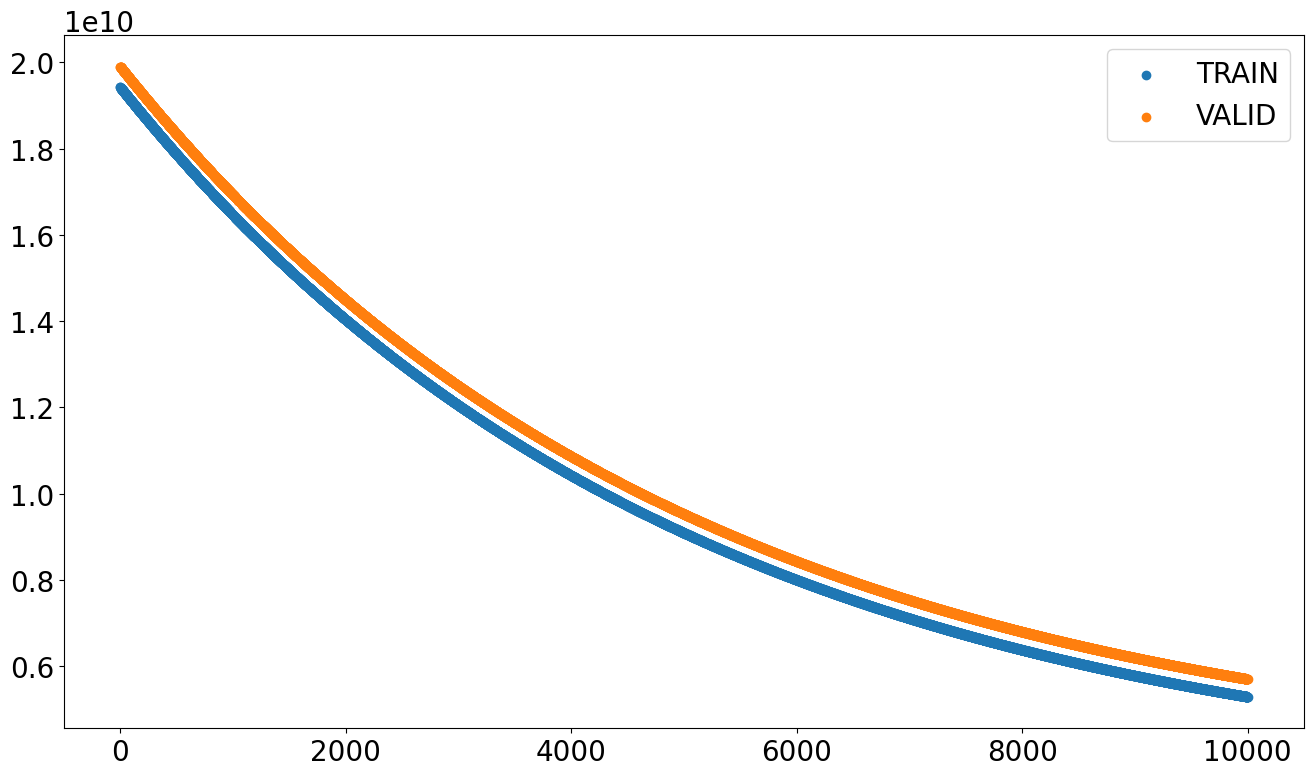

In [70]:
# Plotting the learning curve
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg1.loss)),reg1.loss,label = "TRAIN")
plt.scatter(range(len(reg1.val_loss)),reg1.val_loss, label="VALID")
plt.legend()
plt.plot();

In [71]:
reg3 = ScratchLinearRegression(num_iter=5000, lr=0.01)

reg3.fit(X_train_std, y_train, X_valid_std, y_valid)
y_pred3 = reg3.predict(X_valid_std)

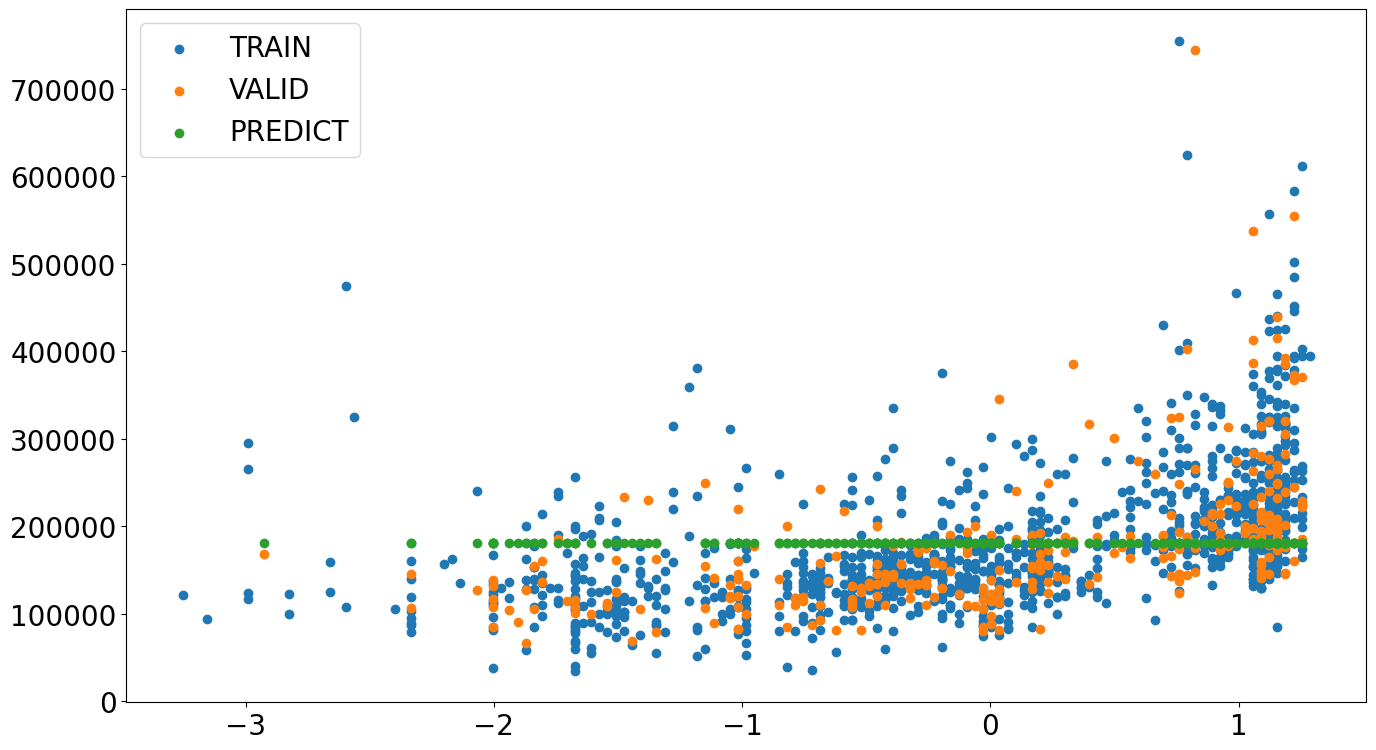

In [72]:
# Visualization of training, validation, and prediction data
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std, y_train, label = "TRAIN")
plt.scatter(X_valid_std, y_valid, label="VALID")
plt.scatter(X_valid_std, y_pred3, label="PREDICT")
plt.legend()
plt.plot();

In [73]:
# mean square error
mse = MSE(y_pred3, y_valid)
print('MSE{:1f}'.format(mse))
print('RMSE{:1f}'.format(np.sqrt(mse)))

MSE6906165228.947298
RMSE83103.340661


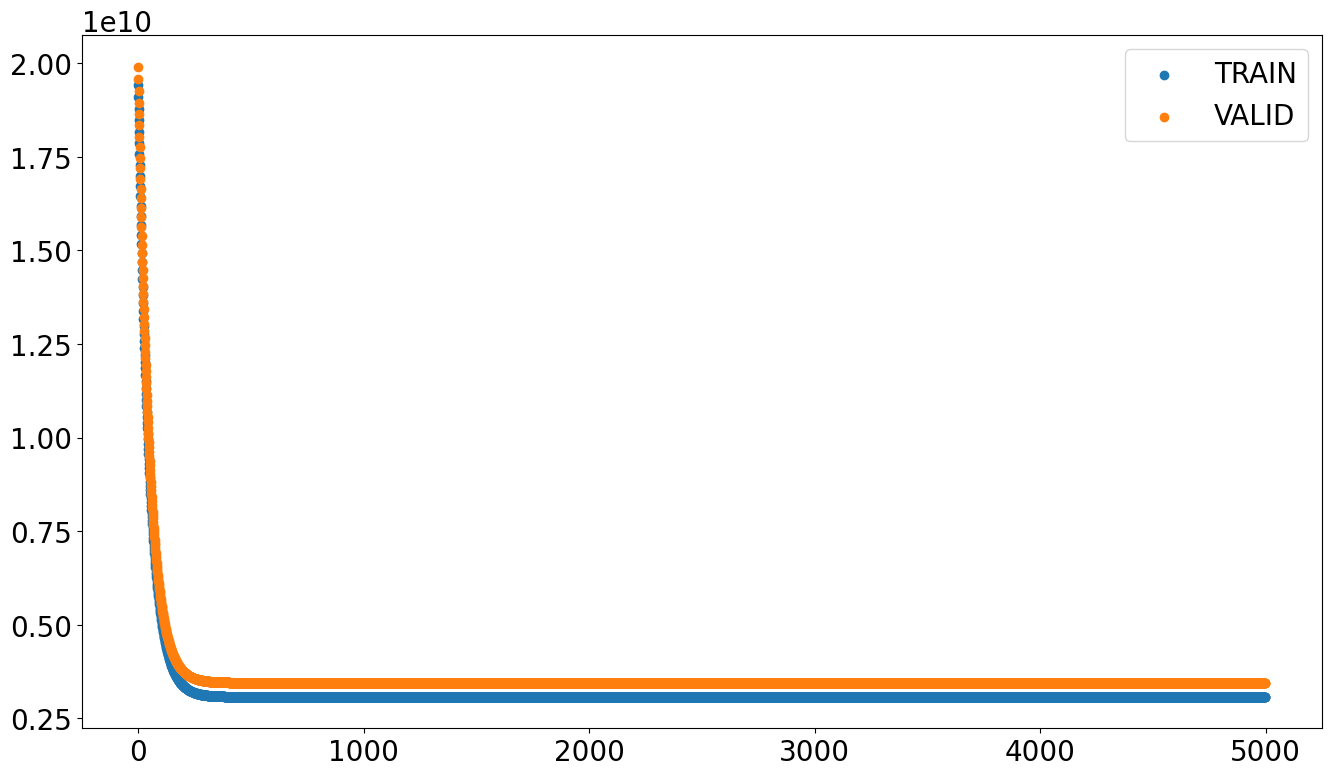

In [74]:
# Plotting the learning curve
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg3.loss)),reg3.loss,label = "TRAIN")
plt.scatter(range(len(reg3.val_loss)),reg3.val_loss, label="VALID")
plt.legend()
plt.plot();

Problem 8: Bias term removal

In [75]:
# Check the result of removing the bias term
reg4 = ScratchLinearRegression(num_iter=10000, lr=0.001, no_bias=True)

reg4.fit(X_train_std, y_train, X_valid_std, y_valid)
y_pred4 = reg4.predict(X_valid_std)

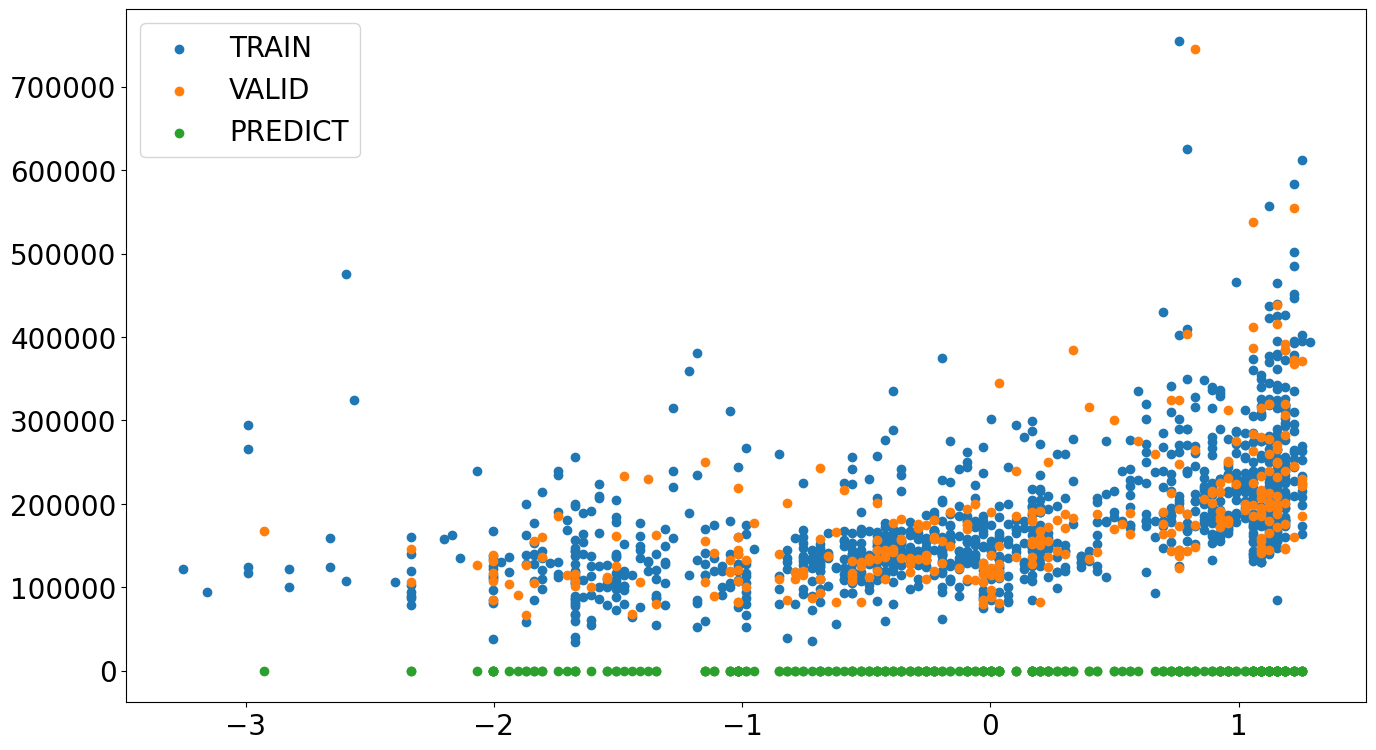

In [76]:
# Visualizing Predictive Data with Sklearn
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(X_train_std, y_train, label = "TRAIN")
plt.scatter(X_valid_std, y_valid, label="VALID")
plt.scatter(X_valid_std, y_pred4, label="PREDICT")
plt.legend()
plt.plot();

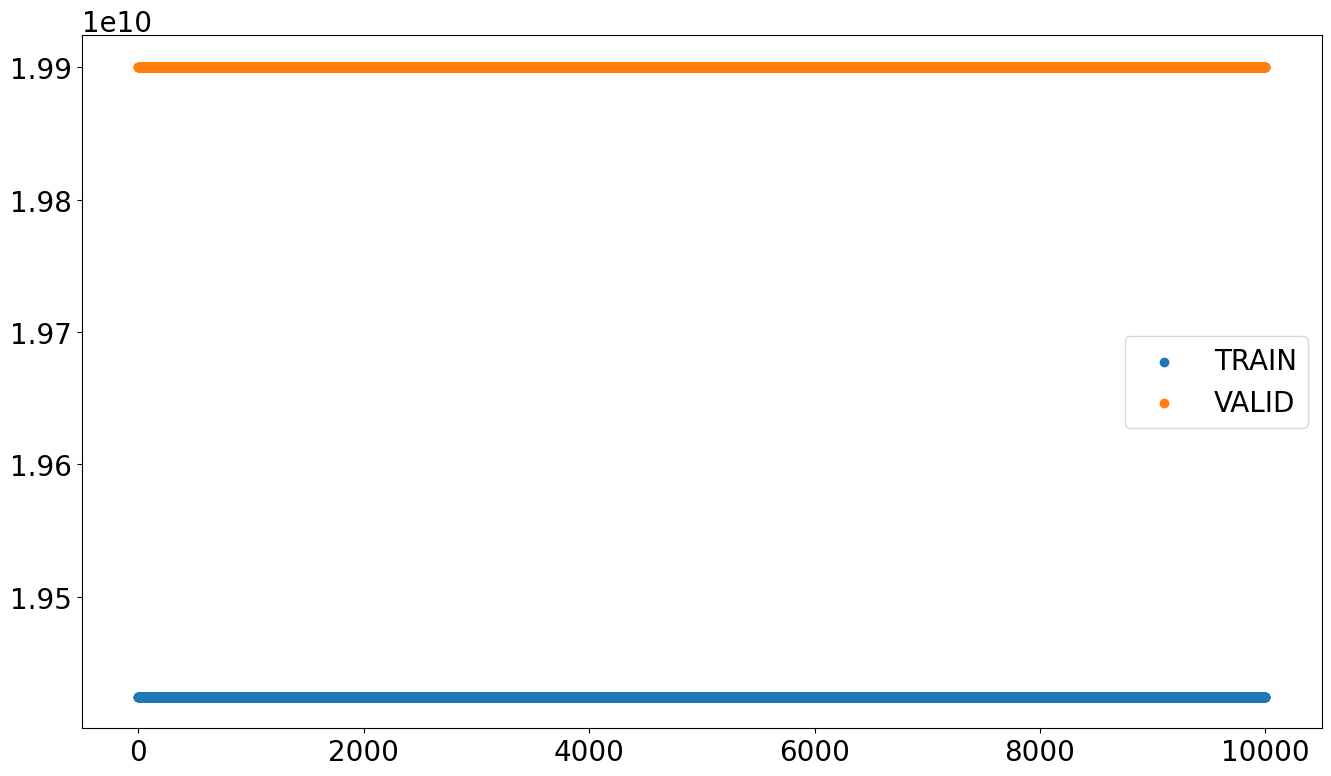

In [77]:
# Plotting the learning curve
fig,ax = plt.subplots(figsize=(16,9))

plt.rcParams["font.size"] = 20
plt.scatter(range(len(reg4.loss)),reg4.loss,label = "TRAIN")
plt.scatter(range(len(reg4.val_loss)),reg4.val_loss, label="VALID")
plt.legend()
plt.plot();